In [2]:
!pip install seaborn


In [3]:
#Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Load dataset
file = r"sales_data.csv"
sales_data = pd.read_csv(file)

In [6]:
#Preview
print("Dataset Preview: ")
print(sales_data.head())
print("\nDataset Info: ")
print(sales_data.info())

Dataset Preview: 
         Date  Day     Month  Year  Customer_Age       Age_Group  \
0  2013-11-26   26  November  2013            19     Youth (<25)   
1  2015-11-26   26  November  2015            19     Youth (<25)   
2  2014-03-23   23     March  2014            49  Adults (35-64)   
3  2016-03-23   23     March  2016            49  Adults (35-64)   
4  2014-05-15   15       May  2014            47  Adults (35-64)   

  Customer_Gender    Country             State Product_Category Sub_Category  \
0               M     Canada  British Columbia      Accessories   Bike Racks   
1               M     Canada  British Columbia      Accessories   Bike Racks   
2               M  Australia   New South Wales      Accessories   Bike Racks   
3               M  Australia   New South Wales      Accessories   Bike Racks   
4               F  Australia   New South Wales      Accessories   Bike Racks   

               Product  Order_Quantity  Unit_Cost  Unit_Price  Profit  Cost  \
0  Hitch Rack

In [7]:
#Check for missing values
print("\n Missing values: ")
print(sales_data.isnull().sum())


 Missing values: 
Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64


In [8]:
#Verify columns
print("Column Names: ", sales_data.columns)

#Correct the Date column if it has different name

if 'Date' not in sales_data.columns:
    #attempt to find similar columns
    possible_date_column = [col for col in sales_data.columns if 'date' in col.lower()]
    if possible_date_column:
        date_column = possible_date_column[0]  #use first match
        print(f"Using column '{date_column}' as the date column.")
    else:
        raise KeyError("No column resembling 'Date' found in dataset.")
else:
    date_column = 'Date'

#Continue with Data Cleaning
sales_data.drop_duplicates(inplace=True)   #remove duplicates
sales_data[date_column] = pd.to_datetime(sales_data[date_column], errors = 'coerce')  #convert Date tp datetime    
sales_data.fillna(sales_data.mean(numeric_only=True), inplace=True)  #fill missing values with column mean


Column Names:  Index(['Date', 'Day', 'Month', 'Year', 'Customer_Age', 'Age_Group',
       'Customer_Gender', 'Country', 'State', 'Product_Category',
       'Sub_Category', 'Product', 'Order_Quantity', 'Unit_Cost', 'Unit_Price',
       'Profit', 'Cost', 'Revenue'],
      dtype='object')


In [9]:
#verify and inspect columns 
print("Column names in dataset: ", sales_data.columns.tolist())

#Update expected columns based on available data
expected_columns = ['Unit_Price','Order_Quantity']   #adjusted for the dataset
mapped_columns = {}

#Map actual column names to expected columns(case-insensitive and trimmed)
for col in expected_columns:
    for actual_col in sales_data.columns:
        if col.lower() == actual_col.lower().strip():
            mapped_columns[col] = actual_col

#check if mapped columns are found

if not mapped_columns:
    raise KeyError("None of expected columns ('Unit_Price','Order_Quantity') are present in the dataset.")
else:
    print("Mapped columns: ", mapped_columns)
#Handle outliers using the IQR method
def remove_outliers(df,column):
    Q1 = df[column].quantile(0.25)  #first quartile(25%)
    Q3 = df[column].quantile(0.75)  #Third quartile(75%)
    IQR = Q3 - Q1  #interquartile range
    lower_bound = Q1 - 1.5*IQR  #Lower bound
    upper_bound = Q3 + 1.5*IQR  #Upper bound
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

#Apply outlier removal for the mapped columns
for logical_col,actual_col in mapped_columns.items():
    print(f"Handling outliers for column: {actual_col}")
    sales_data = remove_outliers(sales_data, actual_col)

print("Outlier handling completed for columns: ", list(mapped_columns.values()))

Column names in dataset:  ['Date', 'Day', 'Month', 'Year', 'Customer_Age', 'Age_Group', 'Customer_Gender', 'Country', 'State', 'Product_Category', 'Sub_Category', 'Product', 'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit', 'Cost', 'Revenue']
Mapped columns:  {'Unit_Price': 'Unit_Price', 'Order_Quantity': 'Order_Quantity'}
Handling outliers for column: Unit_Price
Handling outliers for column: Order_Quantity
Outlier handling completed for columns:  ['Unit_Price', 'Order_Quantity']


In [10]:
#Statistical Analysis
print("\nStatistical summary (Numeric Columns Only): ")
numeric_data = sales_data.select_dtypes(include=['number'])
print(numeric_data.describe())

print("\nCorrelation Matrix (Numeric Columns Only): ")
print(numeric_data.corr())


Statistical summary (Numeric Columns Only): 
                Day          Year  Customer_Age  Order_Quantity     Unit_Cost  \
count  86240.000000  86240.000000  86240.000000    86240.000000  86240.000000   
mean      15.658372   2014.569040     36.089147       15.044620      9.367567   
std        8.792927      1.115938     11.304680        8.709328     11.307300   
min        1.000000   2013.000000     17.000000        1.000000      1.000000   
25%        8.000000   2014.000000     27.000000        7.000000      2.000000   
50%       16.000000   2014.000000     35.000000       15.000000      4.000000   
75%       23.000000   2016.000000     44.000000       23.000000     13.000000   
max       31.000000   2016.000000     87.000000       32.000000     59.000000   

         Unit_Price        Profit          Cost       Revenue  
count  86240.000000  86240.000000  86240.000000  86240.000000  
mean      20.760007    134.709671    135.236352    269.946023  
std       22.304409    179.97556

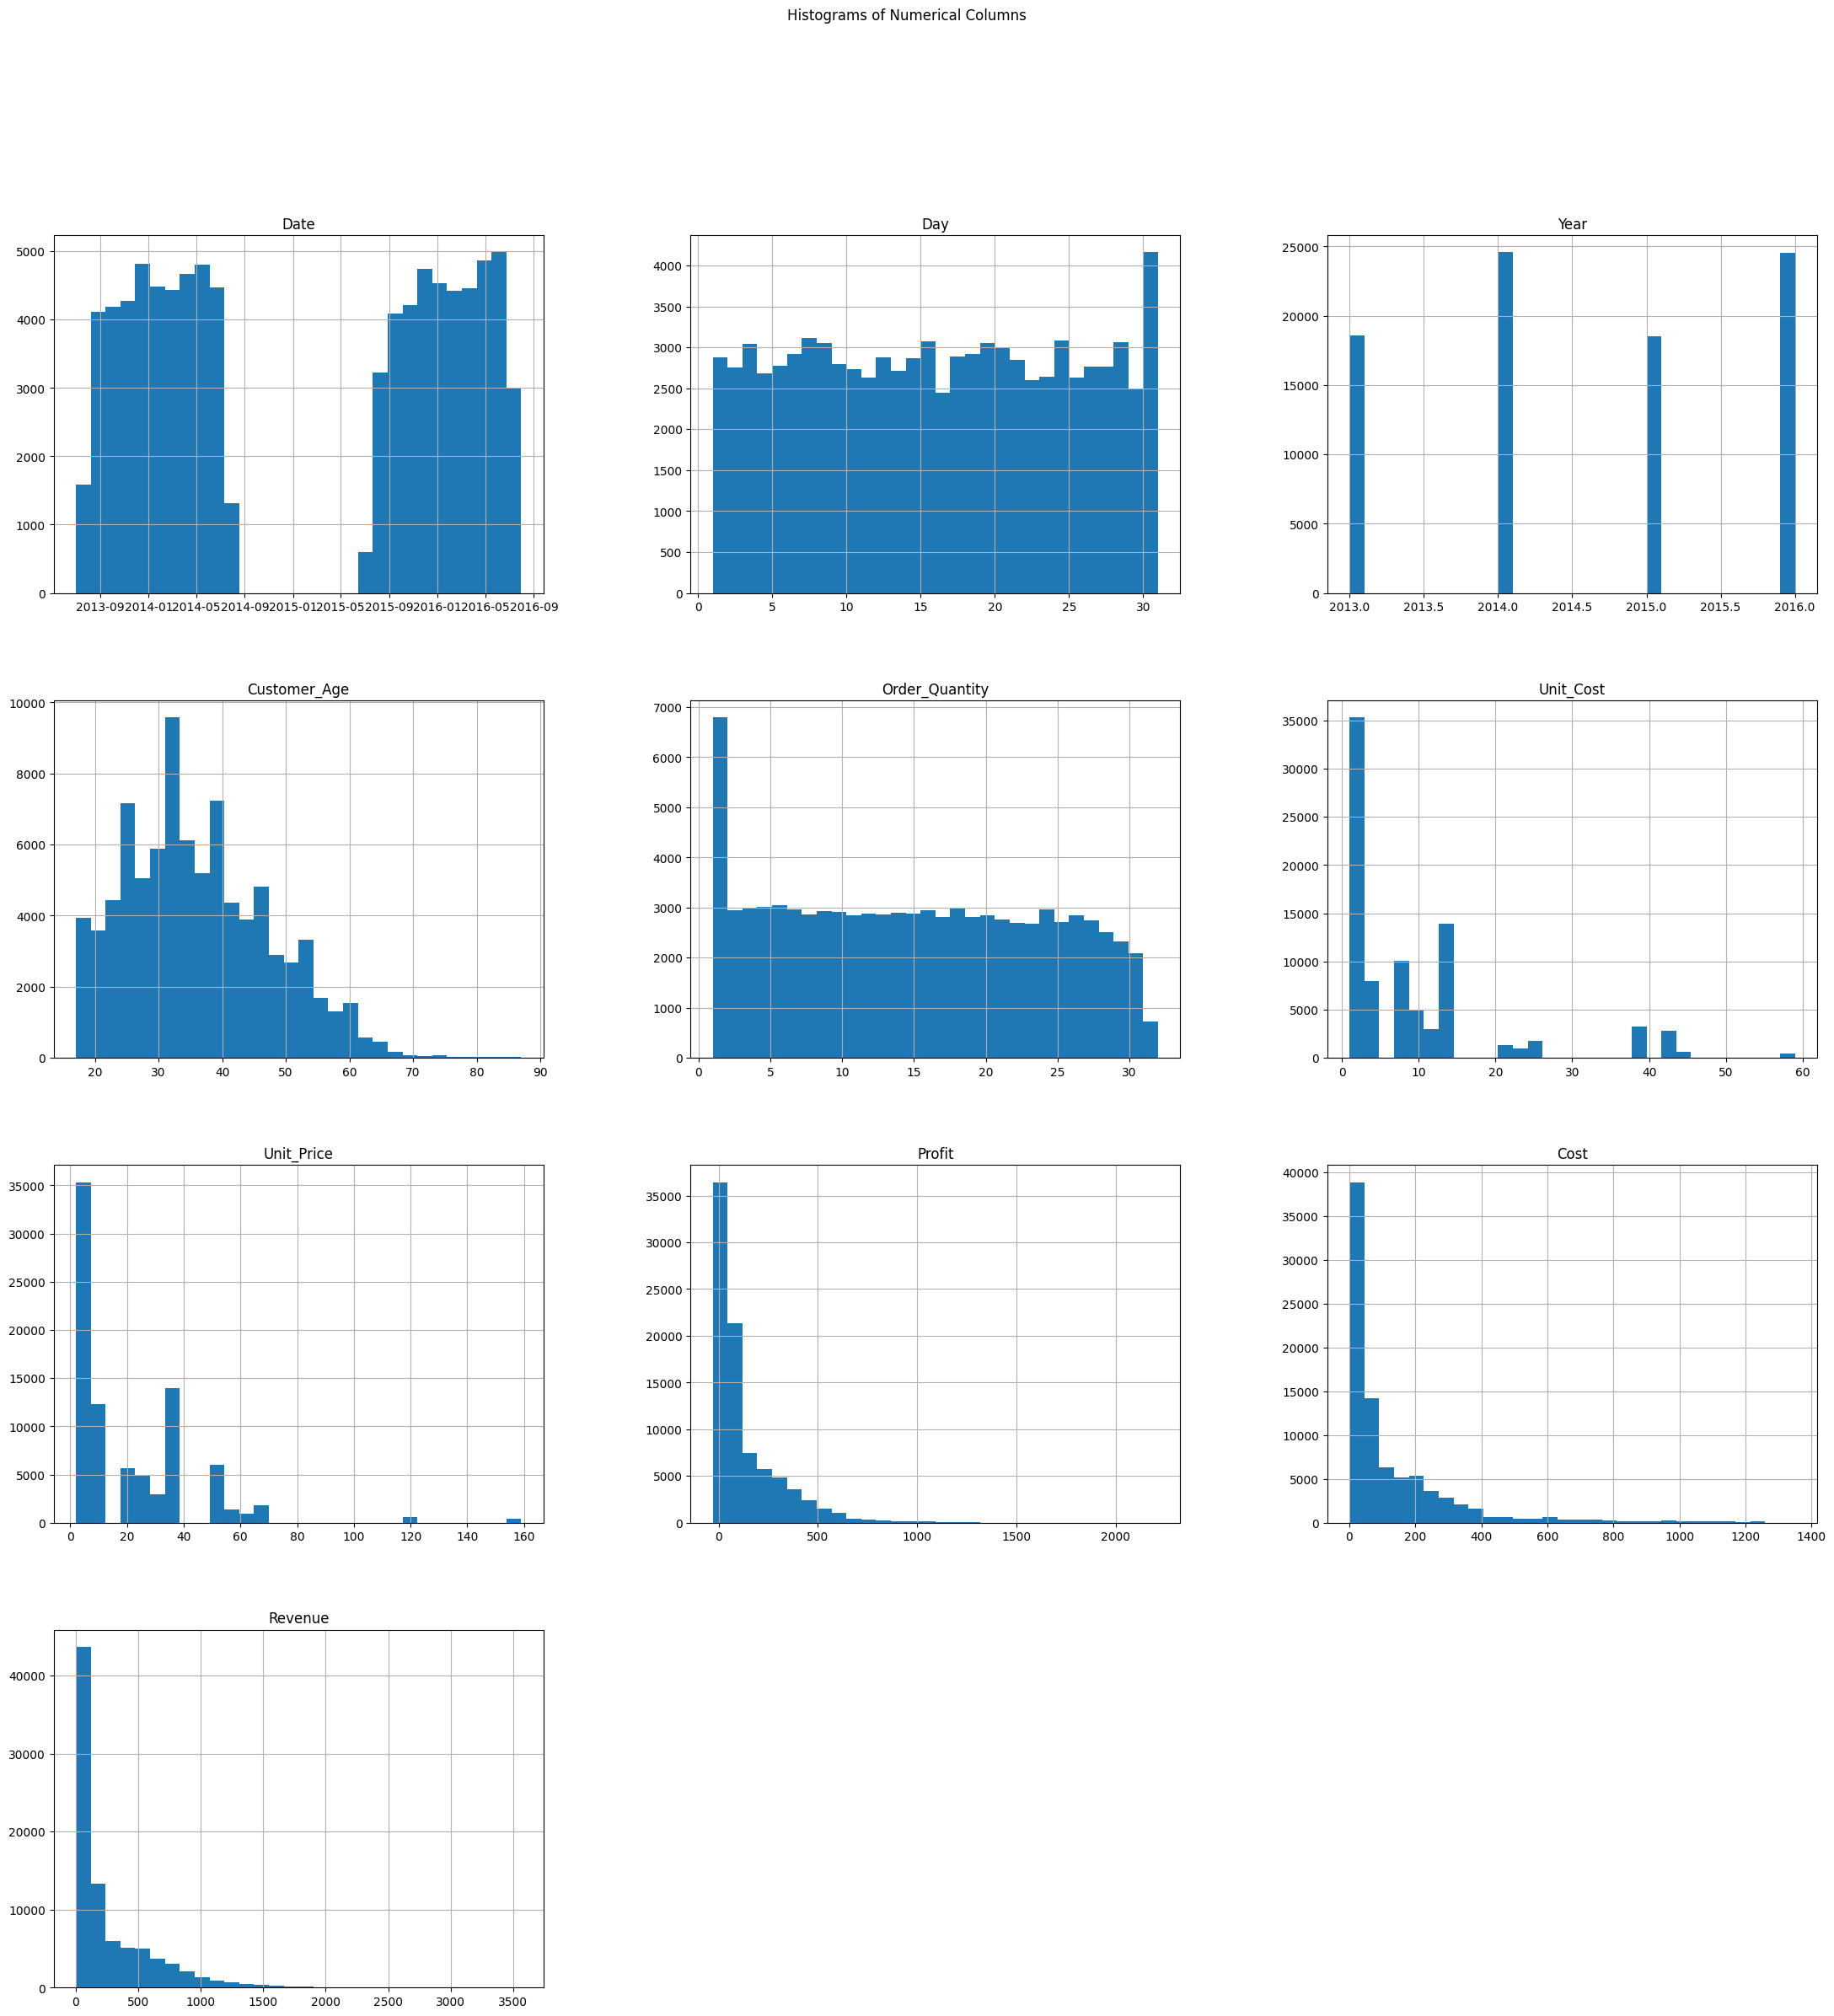

In [20]:
#Data visualization
sales_data.hist(bins=30, figsize=(27, 27))
plt.suptitle("Histograms of Numerical Columns")
plt.show()

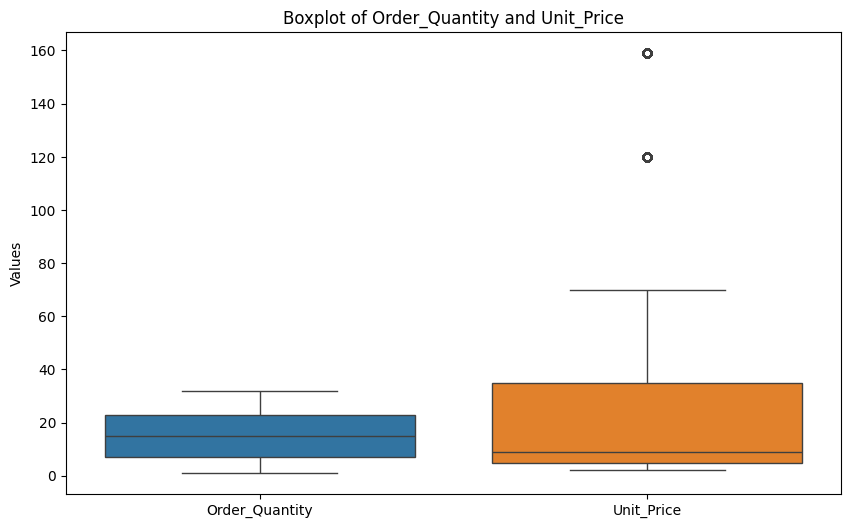

In [21]:
#verify numeric columns for the dataset
numeric_columns = ['Order_Quantity','Unit_Price']  #Adjust list based pn dataset

#Boxplot for detecting outliers
plt.figure(figsize=(10,6))
sns.boxplot(data=sales_data[numeric_columns])
plt.title("Boxplot of Order_Quantity and Unit_Price")
plt.ylabel("Values")
plt.show()

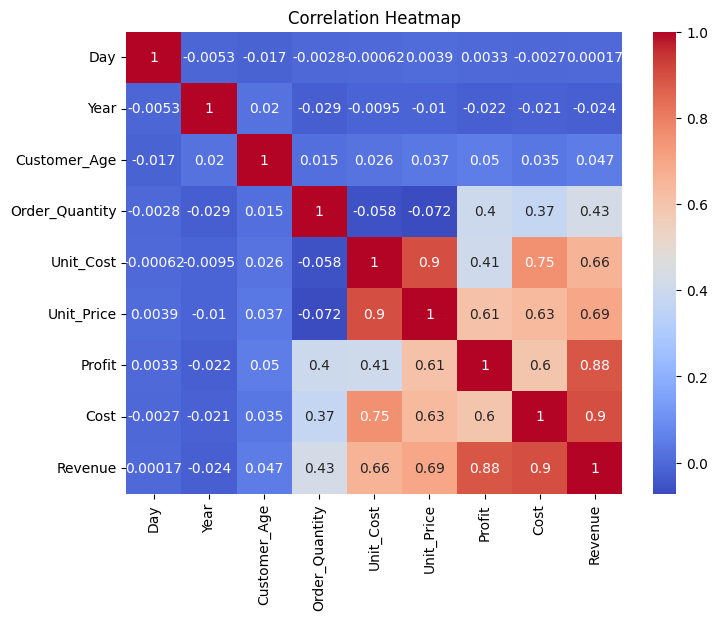

In [22]:
#Select numeric columns only
numeric_data = sales_data.select_dtypes(include=['number'])

#Check if there are numeric columns
if numeric_data.empty:
    print("No numeric columns available for correlation heatmap.")
else:
    #Heatmap of correlations
    plt.figure(figsize=(8,6))
    sns.heatmap(numeric_data.corr(), annot=True, cmap= 'coolwarm')
    plt.title("Correlation Heatmap")
    plt.show()

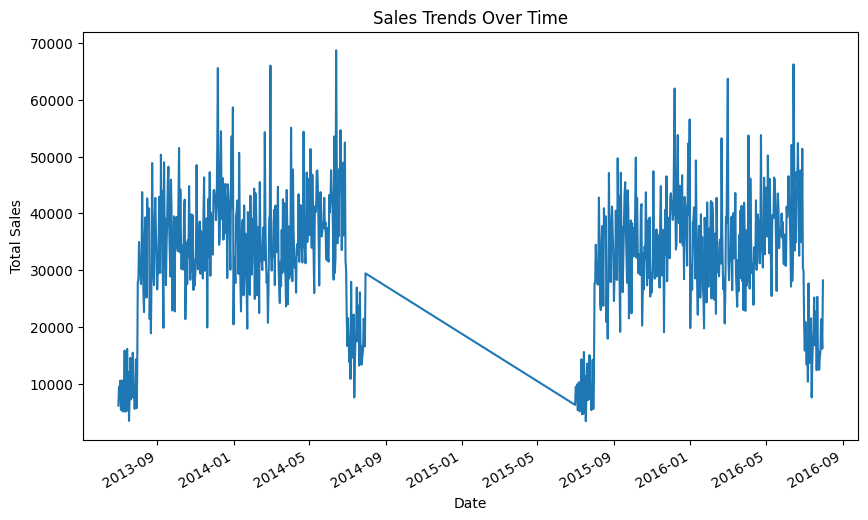

In [23]:
#Convert 'Date' to datetime
sales_data = sales_data.copy()  #Ensure we are working on a copy of the Dataframe

sales_data['Date'] = pd.to_datetime(sales_data['Date'], errors = 'coerce')

#Check for invalid dates and handle them
if sales_data['Date'].isnull().any():
    print("Warning: Some rows have invalid dates and will be dropped.")
    sales_data = sales_datadropna(subset=['Date'])

#Ensure that 'Unit_Price' and 'Order_Quantity' columns exist before proceeding
if 'Unit_Price' in sales_data.columns and 'Order_Quantity' in sales_data.columns:
    #Compute total sales and enusre it's done safely using .loc[]
    sales_data.loc[:, 'total_sales'] = sales_data['Unit_Price']*sales_data['Order_Quantity']

    #Group by 'Date' and calculate total sales
    plt.figure(figsize=(10,6))
    sales_data.groupby('Date')['total_sales'].sum().plot()
    plt.title("Sales Trends Over Time")
    plt.xlabel("Date")
    plt.ylabel("Total Sales")
    plt.show()
else:
    print("Error: 'Unit_Price' and 'Order_Quantity' columns are required to cmpute total sales.")

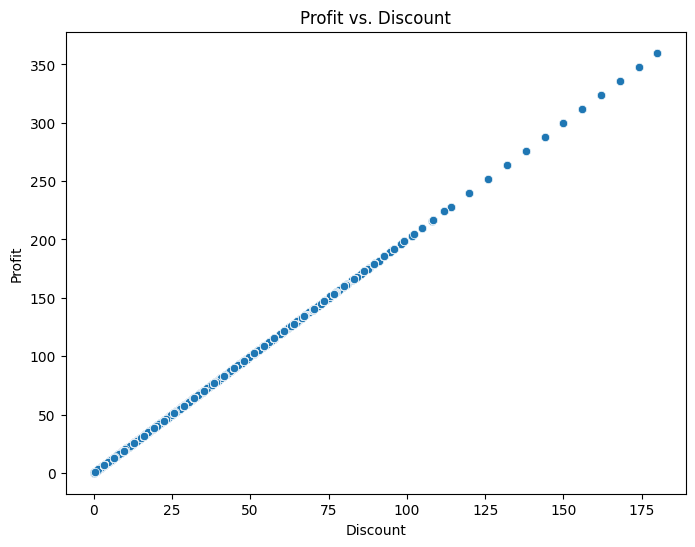

In [24]:
#Assume profit is 10% of total_sales 
sales_data['Profit'] = sales_data['total_sales']*0.10

#Assume discount is 5% of total_sales 
sales_data['Discount'] = sales_data['total_sales']*0.05

#Profit vs Discount Scatter Plot
plt.figure(figsize=(8,6))
sns.scatterplot(x='Discount', y='Profit', data = sales_data)
plt.title("Profit vs. Discount")
plt.show()

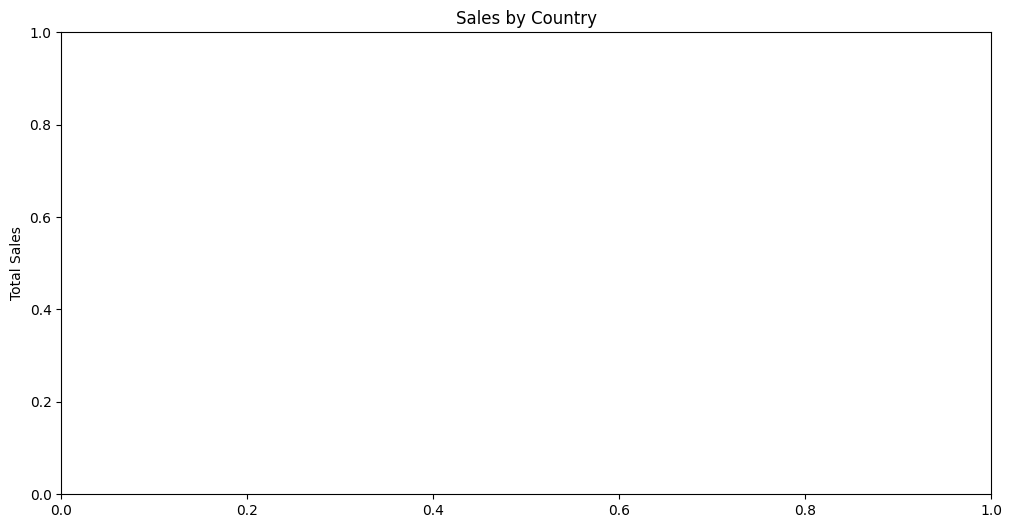

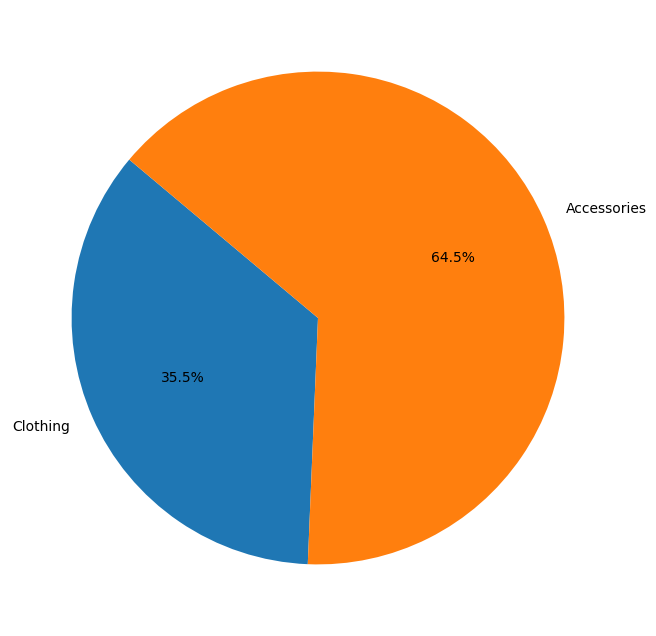

In [25]:
#Sales by Country 
plt.figure(figsize=(12,6))
sales_by_mall = sales_data.groupby('Country')['total_sales'].sum().sort_values()
plt.title("Sales by Country")
plt.ylabel("Total Sales")
plt.show()

#Sales by Category
plt.figure(figsize=(12,6))
sales_by_category = sales_data.groupby('Product_Category')['total_sales'].sum().sort_values()
sales_by_category.plot(kind='pie', autopct='%1.1f%%', startangle = 140, figsize=(8,8))
plt.ylabel("")  #Remove the ylabel to clean up the pie chart
plt.show()

In [29]:
!pip install scikit-learn

  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.1 MB 2.4 MB/s eta 0:00:05
   --- ------------------------------------ 1.0/11.1 MB 2.8 MB/s eta 0:00:04
   ----- ---------------------------------- 1.6/11.1 MB 2.7 MB/s eta 0:00:04
   -------- ------------------------------- 2.4/11.1 MB 3.0 MB/s eta 0:00:03
   ----------- ---------------------------- 3.1/11.1 MB 3.1 MB/s eta 0:00:03
   -------------- ------------------------- 3.9/11.1 MB 3.3 MB/s eta 0:00:03
   ---------------- ----------------------- 4.5/11.1 MB 3.2 MB/s eta 0:00:03
   ------------------- -------------------- 5.5/11.1 MB 3.4 MB/s eta 0:00:02
   ---------------------- ----------------- 6.3/11.1 MB 3.4 MB/s eta 0:00:02
   --------------------------- ------------ 7.6/11.1 MB 3.7 MB/s eta 0:00:01
   -------------------------

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [31]:
#Using available features for predictive modeling
X = sales_data[['Order_Quantity','Unit_Price']] #Predicting total_sales based on Quantity and Price
y = sales_data['total_sales']  #Target available

#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

#Train a Linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

#Predictions
y_pred = model.predict(X_test)

#Model Evalution
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)

#Display the evaluation results
print("\nLinear Regression Model Evaluation: ")
print(f"Mean Squared Error(MSE): {mse}")
print(f"R2 Score: {r2}")



Linear Regression Model Evaluation: 
Mean Squared Error(MSE): 36062.03835282751
R2 Score: 0.728502402595387


In [32]:
#Insights and Recommendations
print("\nInsights and Recommendations: ")
print("- Investigate regions with lower sales and improve marketing.")
print("- Optimize discount strategies to maximize profit.")
print("- Focus on top-performing product categories.")


Insights and Recommendations: 
- Investigate regions with lower sales and improve marketing.
- Optimize discount strategies to maximize profit.
- Focus on top-performing product categories.
